In [1]:
import pandas as pd
import numpy as np

In [24]:
data= pd.read_csv("C:\\Users\\Admin\\Downloads\\delivery_timetrans.csv")

In [25]:
data.head()

,DT1,ST1
0,1.322219,1.000000
1,1.130334,0.602060
2,1.295567,0.778151
3,1.380211,0.954243
4,1.462398,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
DT1    21 non-null float64
ST1    21 non-null float64
dtypes: float64(2)
memory usage: 408.0 bytes


Text(0,0.5,'DT1')

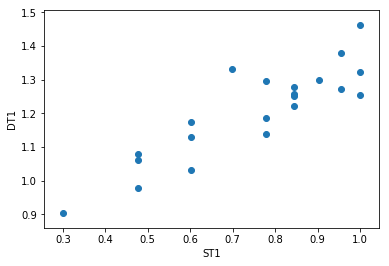

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
x=data.ST1 
y=data.DT1
plt.scatter(x,y)
plt.xlabel("ST1")
plt.ylabel("DT1")

In [6]:
data.corr()

,DT,ST,Unnamed: 2,DT.1,ST.1,DT1,ST1
DT,1.000000,0.825997,NaN,1.000000,0.825997,0.981502,0.833933
ST,0.825997,1.000000,NaN,0.825997,1.000000,0.843177,0.977447
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DT.1,1.000000,0.825997,NaN,1.000000,0.825997,0.981502,0.833933
ST.1,0.825997,1.000000,NaN,0.825997,1.000000,0.843177,0.977447
DT1,0.981502,0.843177,NaN,0.981502,0.843177,1.000000,0.878727
ST1,0.833933,0.977447,NaN,0.833933,0.977447,0.878727,1.000000


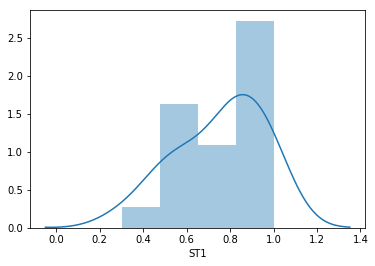

In [28]:
import seaborn as sns
sns.distplot(data['ST1'])

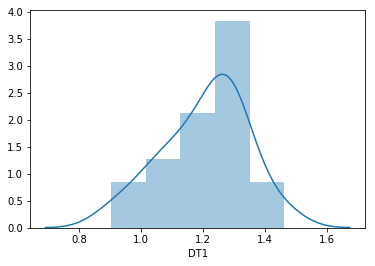

In [29]:
sns.distplot(data['DT1'])

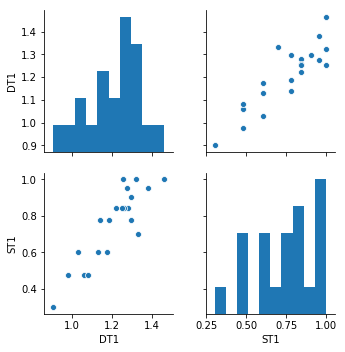

In [30]:

sns.pairplot(data)

In [41]:
import statsmodels.formula.api as smf
model= smf.ols("DT1~ST1",data= data).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DT1   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.60e-07
Time:                        22:18:01   Log-Likelihood:                 27.805
No. Observations:                  21   AIC:                            -51.61
Df Residuals:                      19   BIC:                            -49.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7565      0.058     13.086      0.000       0.636       0.878
ST1            0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         7.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred=model.predict(data.ST1)
pred

0     1.354058
1     1.116280
2     1.221498
3     1.326717
4     1.354058
5     1.221498
6     1.261500
7     1.041626
8     1.354058
9     1.326717
10    1.296152
11    1.116280
12    1.261500
13    1.041626
14    1.041626
15    1.116280
16    1.221498
17    1.261500
18    0.936408
19    1.261500
20    1.174186
dtype: float64

In [36]:
errors=data.DT1-pred
errors.mean()

7.2957513046796e-16

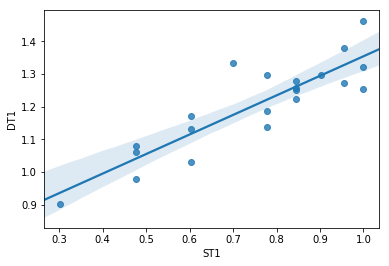

In [37]:
sns.regplot(x="ST1",y="DT1",data=data)

In [38]:
model.params

Intercept    0.756535
ST1          0.597522
dtype: float64

In [39]:
print(model.tvalues,'\n',model.pvalues)

(Intercept    13.085552
ST1           8.024484
dtype: float64, '\n', Intercept    5.921137e-11
ST1          1.601539e-07
dtype: float64)


In [40]:
model.rsquared,model.rsquared_adj

(0.7721613492113069, 0.7601698412750599)